# Exploratory Data Analysis 

A continuación, presentamos un análisis preliminar de los datos suministrados.

In [57]:
# Importando las librerias.
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
# Importando el dataset en un dataframe.
df = pd.read_csv('data\AccidentesAviones.csv')
# Visualizamos nuestro dataframe.
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [59]:
# Visualizamos la información general de nuestro dataframe (df).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

De manera general podemos ver que nuestro df está compuesto por 17 columnas y 5008 filas. Aunque en el conteo de datos nulos suministrados por la tabla refieren a la ausencia de datos nulos, si revisamos el despliegue del df podemos ver que hay entradas con el símbolo "?". Podemos inferir que es la forma del dataset de señalar datos nulos o de los que no se tienen registros. Debemos transformar llevar las entradas con el símbolos "?" a datos nulos para tener una idea de cuántos datos nulos se encuentran realmente en nuestro dataset. 

Llama la atención (a primera vista), la columna "Unnamed: 0." Esta columna parece funcionar como identificadora de cada entrada. 

También podemos observar que la mayoría de las columnas poseen datos de tipo object (incluyendo la columna de fechas). En principio, debemos revisar el contenido de cada columna y asignarle el tipo de dato que permita trabajar la columna cómodamente. 

Podemos observar que hay inconsistencias entre el nombre de las columnas y su contenido. Es decir, los nombres de las columnas no son descriptivos con respecto a los datos

Hay varias columnas cuyos datos deben ser normalizados y llevados al mismo formato. Entre ellas las columnas de fecha y hora.  

Vamos a revisar el contenido de algunas de las columnas.

In [60]:
# Revisamos la columna "Unnamed: 0"
df['Unnamed: 0'].nunique()


5008

Todos los valores de la columna "Unnamed:0" son valores únicos. Esta columna puede ser utilizada como clasificador para una futura base de datos.

In [61]:
# Revisamos el contenido de la columna "summary"
df.summary[0]

'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.'

La columna "summary" contiene una descripción del siniestro. Curiosamente la primera entrada refiere al primer accidente aereo registrado. Uno de los pilotos era Orville Wright, unos de los primeros fabricantes de aeroplanos de la historia. 

In [62]:
# Revisamos el contenido de la columna "ac_type"
df.ac_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

La columna "ac_type" parece contener datos referentes al modelo de la aeronave. 

In [63]:
# Formateando los datos de la columna "fecha"
df.fecha = pd.to_datetime(df.fecha, infer_datetime_format=True)
df.fecha.head()

0   1908-09-17
1   1909-09-07
2   1912-07-12
3   1913-08-06
4   1913-09-09
Name: fecha, dtype: datetime64[ns]

In [64]:
# Creamos las columnas "year", "month" y "day"
df['year']= df['fecha'].dt.year
df['month']= df['fecha'].dt.month
df['day']= df['fecha'].dt.day

In [65]:
# Reemplazamos el símbolo "?" por un valor none.
df.replace({'?':None}, inplace=True)
'''df.replace({'PASAJEROS A BORDO':'?'},{'PASAJEROS A BORDO':'9999'}, inplace=True)
df.replace({'crew_aboard':'?'},{'crew_aboard':'9999'}, inplace=True)
df.replace({'cantidad de fallecidos':'?'},{'cantidad de fallecidos':'9999'}, inplace=True)
df.replace({'passenger_fatalities':'?'},{'passenger_fatalities':'9999'}, inplace=True)
df.replace({'crew_fatalities':'?'},{'crew_fatalities':'9999'}, inplace=True)
df.replace({'ground':'?'},{'ground':'9999'}, inplace=True)
df.replace({'all_aboard':'?'},{'all_aboard':'9999'}, inplace=True)'''

"df.replace({'PASAJEROS A BORDO':'?'},{'PASAJEROS A BORDO':'9999'}, inplace=True)\ndf.replace({'crew_aboard':'?'},{'crew_aboard':'9999'}, inplace=True)\ndf.replace({'cantidad de fallecidos':'?'},{'cantidad de fallecidos':'9999'}, inplace=True)\ndf.replace({'passenger_fatalities':'?'},{'passenger_fatalities':'9999'}, inplace=True)\ndf.replace({'crew_fatalities':'?'},{'crew_fatalities':'9999'}, inplace=True)\ndf.replace({'ground':'?'},{'ground':'9999'}, inplace=True)\ndf.replace({'all_aboard':'?'},{'all_aboard':'9999'}, inplace=True)"

In [66]:
# Cambiamos el tipo de dato de esas columnas a int.
'''df['PASAJEROS A BORDO'] = df['PASAJEROS A BORDO'].astype(int)
df['crew_aboard'] = df['crew_aboard'].astype(int)
df['cantidad de fallecidos'] = df['cantidad de fallecidos'].astype(int)
df['passenger_fatalities'] = df['passenger_fatalities'].astype(int)
df['crew_fatalities'] = df['crew_fatalities'].astype(int)
df['ground'] = df['ground'].astype(int)
df['all_aboard'] = df['all_aboard'].astype(int)'''

"df['PASAJEROS A BORDO'] = df['PASAJEROS A BORDO'].astype(int)\ndf['crew_aboard'] = df['crew_aboard'].astype(int)\ndf['cantidad de fallecidos'] = df['cantidad de fallecidos'].astype(int)\ndf['passenger_fatalities'] = df['passenger_fatalities'].astype(int)\ndf['crew_fatalities'] = df['crew_fatalities'].astype(int)\ndf['ground'] = df['ground'].astype(int)\ndf['all_aboard'] = df['all_aboard'].astype(int)"

In [67]:
# Vamos a renombrar algunas columnas.
df.rename(columns = {'Unnamed: 0':'id','fecha':'date', 'HORA declarada':'time', 'Ruta':'location', 'OperadOR':'operator','all_aboard':'aboard'
       ,'ac_type':'type','PASAJEROS A BORDO':'passengers', 'cantidad de fallecidos':'fatalities','crew_aboard':'crew'},inplace=True)

In [68]:
# Vamos a crear una función para formatear la columna "time".
def to_time(x):
    if x:
        if len(x) == 3:
            try: 
                return datetime.datetime.strptime(x.zfill(4),'%H%M').strftime('%H:%M')
            except: 
                return datetime.datetime.strptime(x.ljust(4, '0'),'%H%M').strftime('%H:%M')
        else:
            return datetime.datetime.strptime(x,'%H%M').strftime('%H:%M')     
    else:
        return None

In [69]:
# Aplicamos la función y verificamos el resultado.
df['time'] = df['time'].str.replace(r'\D','', regex=True).str.strip()
df['time'] = df['time'].apply(to_time)
df['time'].head()

0    17:18
1     None
2    06:30
3     None
4    18:30
Name: time, dtype: object

Es recomendable cambiar los datos None por NaN. Los valores de tipo NaN pueden ser usados como valores numéricos en operaciones matemáticas.

In [70]:
# Cambiando los valores None a NaN. 
df = df.fillna(value=np.nan)

Vamos a darle formato a algunas columnas.

In [71]:
# Definimos la función de formato.
def format_str(df, column):
    return df[column].astype(str).str.strip().str.title()

In [72]:
df.columns

Index(['id', 'date', 'time', 'location', 'operator', 'flight_no', 'route',
       'type', 'registration', 'cn_ln', 'aboard', 'passengers', 'crew',
       'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground',
       'summary', 'year', 'month', 'day'],
      dtype='object')

In [73]:
# Formateando
columns = ['location', 'operator', 'route', 'type', 'summary']
for column in columns:
    df[column] = format_str(df,column)

#df.head()

In [74]:
# Formateamos los códigos.
df.flight_no.replace(' ','', inplace=True)
df.registration.replace(' ','', inplace=True)
df.cn_ln.replace(' ','', inplace=True)

In [75]:
# Definimos una función para formatear los valores numéricos.
def format_int(df, column):
    x = df[column].fillna(value=np.nan)
    x = x.fillna(9999).astype(int)
    x.replace(9999, np.nan, inplace=True)
    
    return x


In [76]:
df.columns

Index(['id', 'date', 'time', 'location', 'operator', 'flight_no', 'route',
       'type', 'registration', 'cn_ln', 'aboard', 'passengers', 'crew',
       'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground',
       'summary', 'year', 'month', 'day'],
      dtype='object')

In [77]:
# Aplicamos la función a las columnas pertinentes
columns = ['aboard', 'passengers', 'crew', 'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground']
for column in columns:
    df[column] = format_int(df,column)

In [78]:
# Vamos a completar los valores nulos de las columnas descriptivas.
df.route.fillna('Not defined', inplace=True)
df.summary.fillna('No comments', inplace=True)
df.operator.fillna('Unknown', inplace=True)
df.type.fillna('No Type', inplace=True)

In [79]:
# Vamos crear dos columnas nuevas: Una que indique si la aeronave era de uso militar y otra que indique el sitio del accidente.
df["military"] = df['operator'].str.contains("Military",regex=False)
df['crash_site']  = df['location'].str.split(',').str[-1].str.strip()

In [80]:
# Vamos a crear una columna con el número de sobrevivientes y el porcentajes de personas que sobrevivieron a cada accidente.
df['survived'] = df['aboard'] - df['fatalities']
df["survival_rate"] = 100 * (df["survived"]) / df["aboard"]

In [81]:
# Vamos a crear una columna con el nombre del día en que ocurrió el accidente.
df['day_of_the_week'] = pd.DatetimeIndex(df['date']).day_name()

In [82]:
# Vamos a crear una variable para el nombre del mes en que ocurrió el accidente.
df['month_year'] = pd.DatetimeIndex(df['date']).month_name()

In [83]:
# La columna military es mejor en tenerla en función de valores de 0 y 1.
df["military"] = df.operator.str.lower().str.contains("military", regex=False)
df.military = df.military.astype(int)

A continuación vamos a usar una librería que nos permitirá conocer el país de origen de las diferentes aeronaves involucradas en los accidentes aereos. 

La librería completa se puede encontrar en el siguiente enlace:

https://github.com/Collen-Roller/flydenity

In [84]:
# Importamos la libreria
from flydenity import Parser

In [85]:
# Normalizamos la columna "registration"
df.registration.replace(' ','', inplace=True)
df.registration  = df.registration.astype(str)

In [86]:
# Creamos un dataframe con la información de los países fabricantes de cada aeronave.
parser = Parser()
lista = []
for nrow in range(df.shape[0]):
    code = df.registration[nrow]
    d = {'code': code}
    info = parser.parse(code)
    if info:
        d.update(info)
    else:
        continue
        
    lista.append(d)

df_aviones = pd.DataFrame(lista)
df_aviones.head()

,code,nation,description,iso2,iso3
0,SC1,Sweden,general,SE,SWE
1,G-EAHG,United Kingdom,general,GB,GBR
2,G-EAHF,United Kingdom,general,GB,GBR
3,204,Guernsey,general,GG,GGY
4,G-EALW,United Kingdom,general,GB,GBR


A continuación, vamos a obtener las coordenadas geográficas de los sitios donde ocurrieron los accidentes. Utilizaremos la librería geopy.

https://geopy.readthedocs.io/en/stable/

In [87]:
'''# Importamos la libreria.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user")

# Definimos una función que nos arroje las coordenadas.
def get_coordinates(x):
    try:
        location = geolocator.geocode(x)
        return (location.latitude,location.longitude)
    except:
        return None

# Creamos una columna que contenga las coordenadas.
df['temp_coor'] = df.location.apply(get_coordinates)'''

'# Importamos la libreria.\nfrom geopy.geocoders import Nominatim\ngeolocator = Nominatim(user_agent="user")\n\n# Definimos una función que nos arroje las coordenadas.\ndef get_coordinates(x):\n    try:\n        location = geolocator.geocode(x)\n        return (location.latitude,location.longitude)\n    except:\n        return None\n\n# Creamos una columna que contenga las coordenadas.\ndf[\'temp_coor\'] = df.location.apply(get_coordinates)'

In [88]:
'''# Visualizamos la columna de coordenadas realizada.
df.temp_coor.head()'''

'# Visualizamos la columna de coordenadas realizada.\ndf.temp_coor.head()'

In [89]:
'''# Es conveniente separar los datos en dos columnas: Una para la latitud y otra para la longitud.
df[['latitude', 'longitude']] = pd.DataFrame(df.temp_coor.tolist(), index=df.index)
# Descartamos la columna "temp_coor"
df.drop(['temp_coor'], axis=1, inplace=True)'''

'# Es conveniente separar los datos en dos columnas: Una para la latitud y otra para la longitud.\ndf[[\'latitude\', \'longitude\']] = pd.DataFrame(df.temp_coor.tolist(), index=df.index)\n# Descartamos la columna "temp_coor"\ndf.drop([\'temp_coor\'], axis=1, inplace=True)'

In [90]:
from ast import literal_eval as make_tuple

df_temp = pd.read_csv('data/coordenadas.csv')
df = pd.concat([df, df_temp], axis=1)

def str_to_tuple(x):
    try:
        return make_tuple(x)
    except: 
        return np.nan

df.temp_coor = df.temp_coor.apply(str_to_tuple)
df[['latitude', 'longitude']] = pd.DataFrame(df.temp_coor.tolist(), index=df.index)

A continuación voy a realizar algunas visualizaciones:

In [91]:
# Set los temas para los gráficos.
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

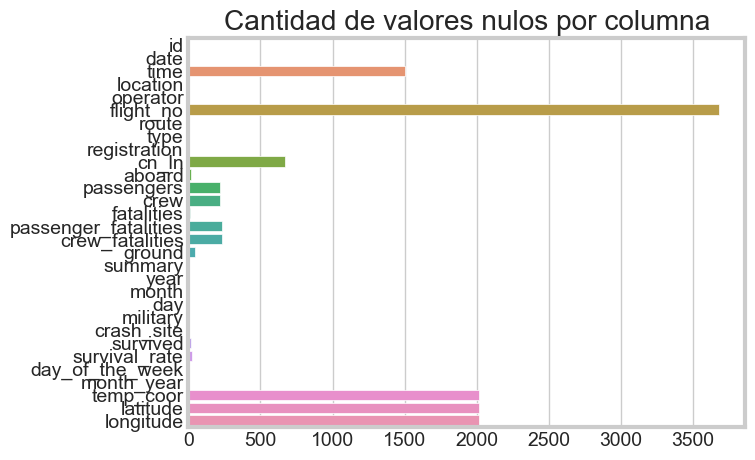

In [92]:
# Graficamos los valores nulos.
sns.barplot(x = df.isnull().sum().values, y = df.columns)
plt.title('Cantidad de valores nulos por columna');

In [93]:
df.columns

Index(['id', 'date', 'time', 'location', 'operator', 'flight_no', 'route',
       'type', 'registration', 'cn_ln', 'aboard', 'passengers', 'crew',
       'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground',
       'summary', 'year', 'month', 'day', 'military', 'crash_site', 'survived',
       'survival_rate', 'day_of_the_week', 'month_year', 'temp_coor',
       'latitude', 'longitude'],
      dtype='object')

In [94]:
df.nunique()

id                      5008
date                    4577
time                    1061
location                4124
operator                2258
flight_no                892
route                   3835
type                    2416
registration            4701
cn_ln                   3907
aboard                   244
passengers               234
crew                      34
fatalities               199
passenger_fatalities     190
crew_fatalities           28
ground                    51
summary                 4856
year                     111
month                     12
day                       31
military                   2
crash_site               518
survived                 178
survival_rate            654
day_of_the_week            7
month_year                12
temp_coor               2161
latitude                2160
longitude               2161
dtype: int64

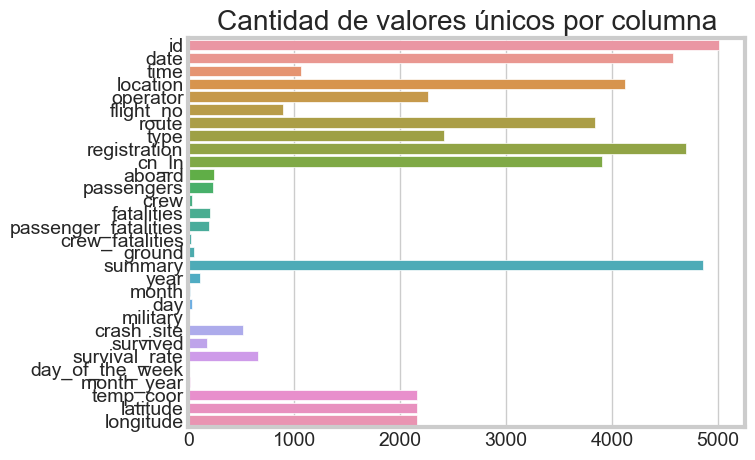

In [95]:
# Vamos a ver los valores únicos por cada columna.
sns.barplot(x = df.nunique().values, y = df.columns)
plt.title('Cantidad de valores únicos por columna');

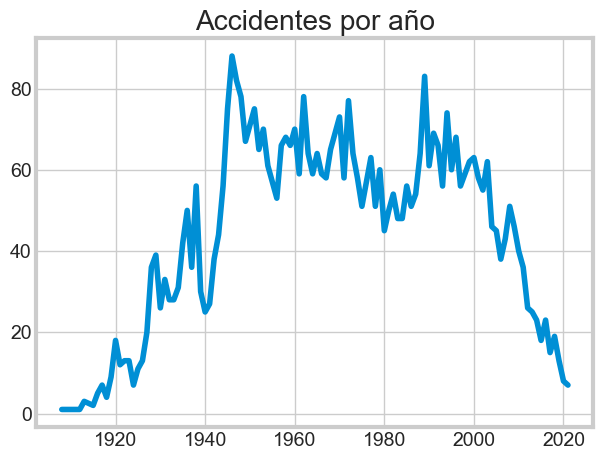

In [96]:
# Vamos a ver la cantidad de accidentes por año.
yearly = df.date.dt.year.value_counts()

sns.lineplot(x=yearly.index, y=yearly.values)
plt.title('Accidentes por año');

In [97]:
# Definimos una función que extrae los diez primeros valores de cada columna y los coloca en una gráfica.
def ten_values(df,column, axis=None):
    plane = df.pivot_table(index = [column], aggfunc ='size').sort_values(ascending=False)
    sns.barplot(x=plane.values[:10], y=plane.index[:10],)
    plt.title('10 {} con más accidentes'.format(column))
    plt.show()
    plt.close()

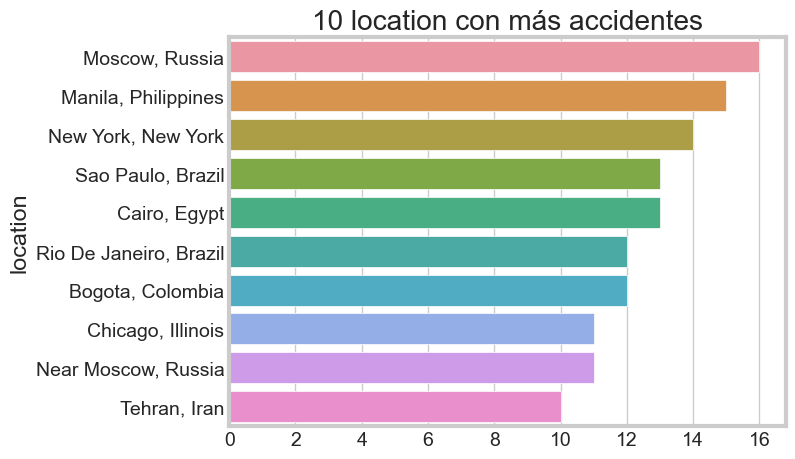

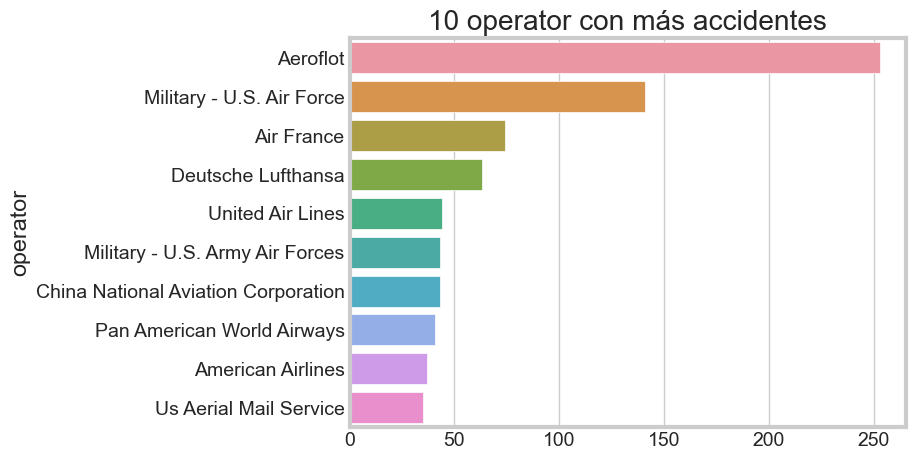

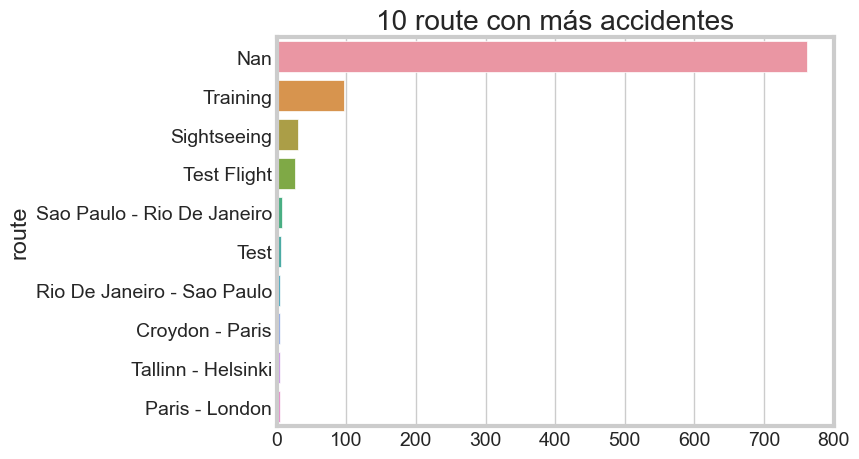

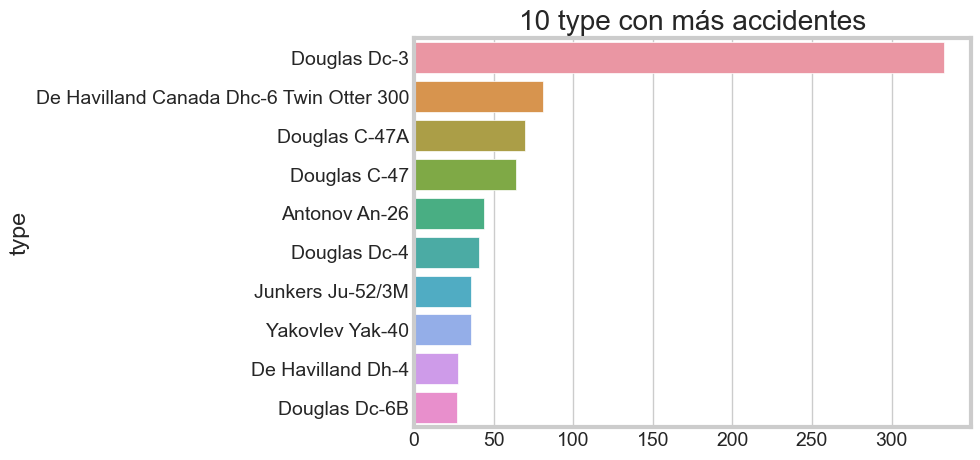

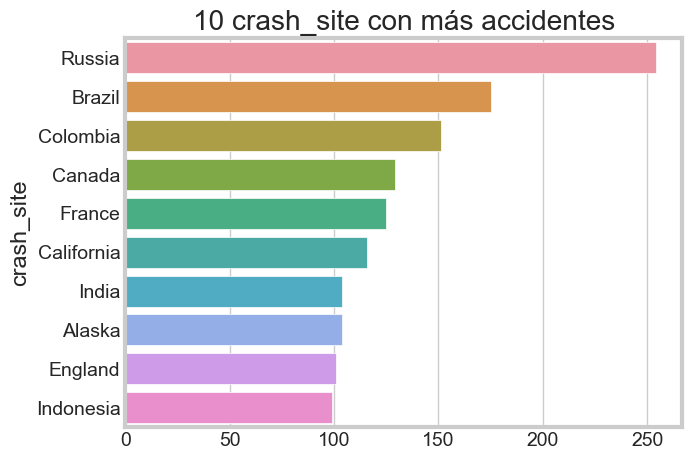

In [98]:
# Para las columna location, operator, route, type, crash_site.
columns = ['location', 'operator', 'route', 'type', 'crash_site']
for column in columns:
    ten_values(df, column)

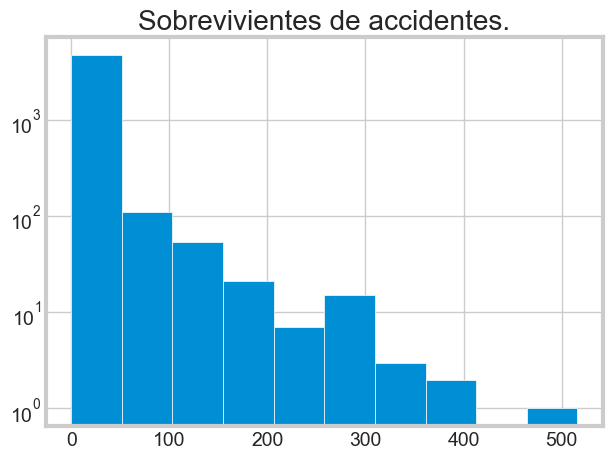

In [99]:
# Podemos hacer un histograma para ver la distribución de sobrevivientes.
df.survived.hist(log=True)
plt.title('Sobrevivientes de accidentes.');

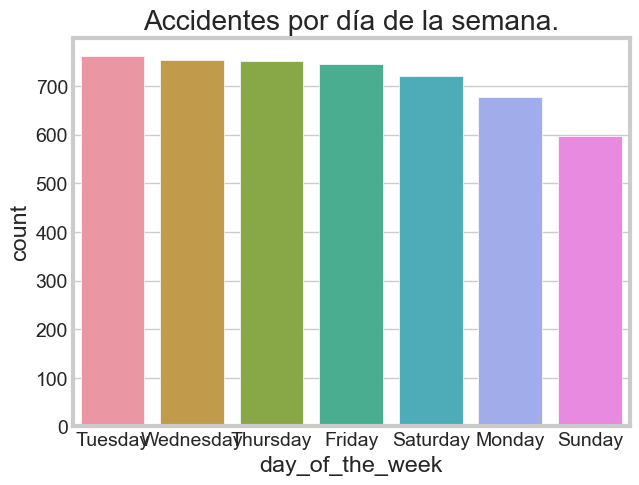

In [100]:
# Número de accidentes según el día de la semana.
sns.countplot(x=df.day_of_the_week,order = df.day_of_the_week.value_counts().index)
plt.title('Accidentes por día de la semana.');

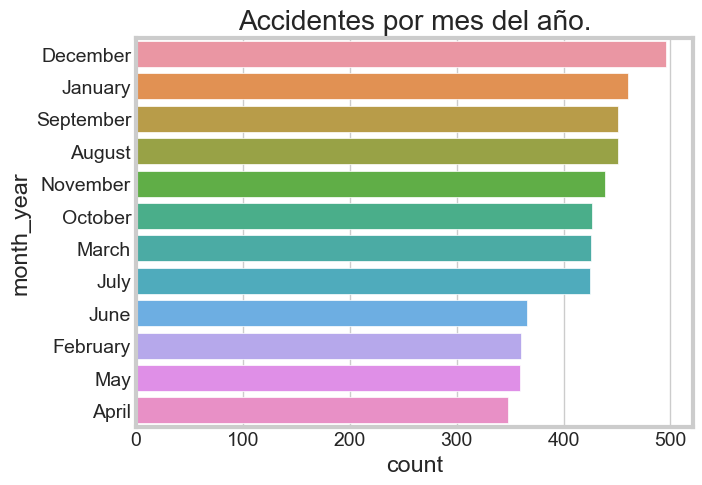

In [101]:
# Número de accidentes según el mes del año
sns.countplot(y=df.month_year, order= df.month_year.value_counts().index)
plt.title('Accidentes por mes del año.');

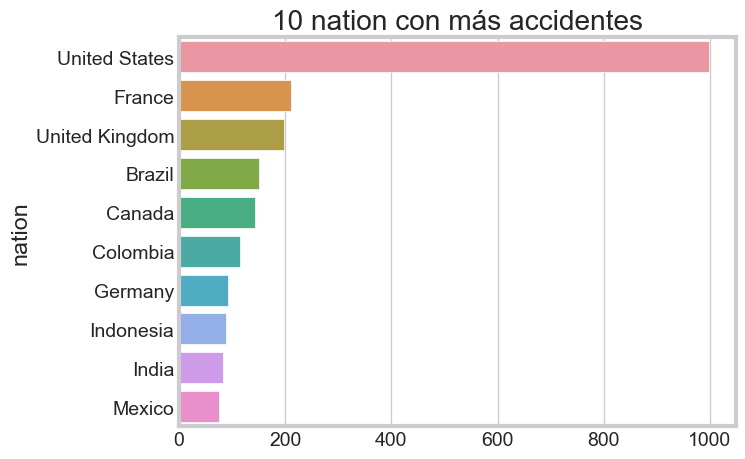

In [102]:
ten_values(df_aviones, 'nation')

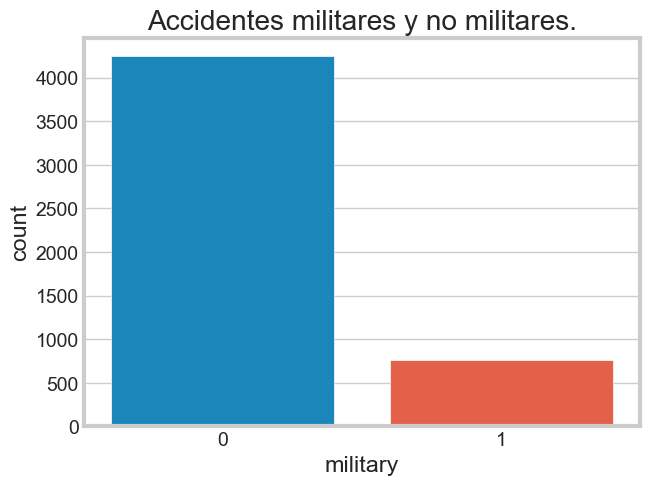

In [103]:
# Cantidad de accidentes de aeronaves militares contra aeronaves civiles.
sns.countplot(data=df, x='military')
plt.title('Accidentes militares y no militares.');

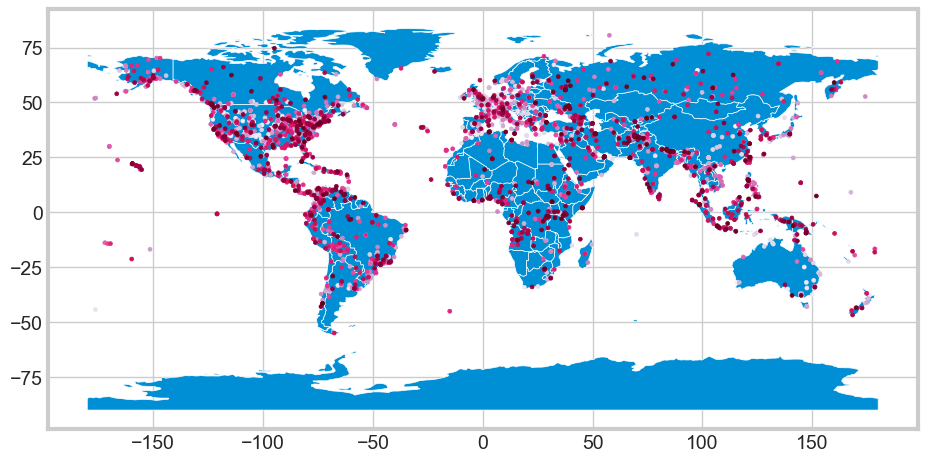

In [104]:
# Gráfico de la ubicación geográfica de los accidentes registrados.
# Importando las librerias necesarias. 
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Definiendo los parámetros necesarios.
dfpos = df.loc[(df.latitude.notnull())&(df.longitude.notnull())].copy()

geometry = [Point(xy) for xy in zip(dfpos['longitude'], dfpos['latitude'])]
gdf = GeoDataFrame(dfpos, geometry=geometry)    

# Graficando los puntos geográficos. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', cmap='PuRd', markersize=8);

A continuación, realizaré una busqueda de palabras claves asociadas a las causas del accidente dentro de la columna summary

In [105]:
# Definiendo la función de búsqueda.
def add_list(x, val):
    if x:
        if val in x:
            pass
        else:
            x.append(val)
    else:
        x = [val]
    return x

def find_cause(df, type_cause):
    error = type_cause[0]
    type_errors = type_cause[1]

    for type_error in type_errors:
        df.loc[df.summary.str.lower().str.contains(type_error, na=False),'error_key'] = df.loc[df.summary.str.lower().str.contains(type_error, na=False)]['error_key'].apply(lambda x: add_list(x,error))
        df.loc[df.summary.str.lower().str.contains(type_error, na=False),'type_error'] = df.loc[df.summary.str.lower().str.contains(type_error, na=False)]['type_error'].apply(lambda x: add_list(x,type_error))


In [106]:
# Definiendo las listas con las palabras claves.
human = ('human_error',['pilot', 'maneuvers', 'air traffic', 'controler'])
mechanical = ('mechanical_issues',['mechanical', 'engine', 'maintenance', 'fuel'])
weather = ('weather',['weather', 'storm', 'rain', 'thunderstorm'])
takeoff = ('takeoff',['taxi','takeoff'])
landing = ('landing',['descent','landing'])
waterCrash = ('water_crash',['sea','water','ditching','water crash'])
terrorism = ('terrorism',['terrorism','hijacking', 'hijack','skyjacking', 'plane hijacking', 'plane jacking', 'air robbery', 'air piracy'])


# Creando las columnas necesarias.
errors = [human, mechanical, weather, takeoff, landing, waterCrash, terrorism]
df = df.copy()
df['error_key'] = None
df['type_error'] = None

for error in errors:
    find_cause(df, error)

In [107]:
# Creamos dummies de la columna error_key.
df[['human_error' ,'landing', 'mechanical_issues',  'takeoff',  'terrorism',  'water_crash',  'weather']] = df['error_key'].str.join('|').str.get_dummies()

A continuación vamos a realizar un análisis de los outliers.

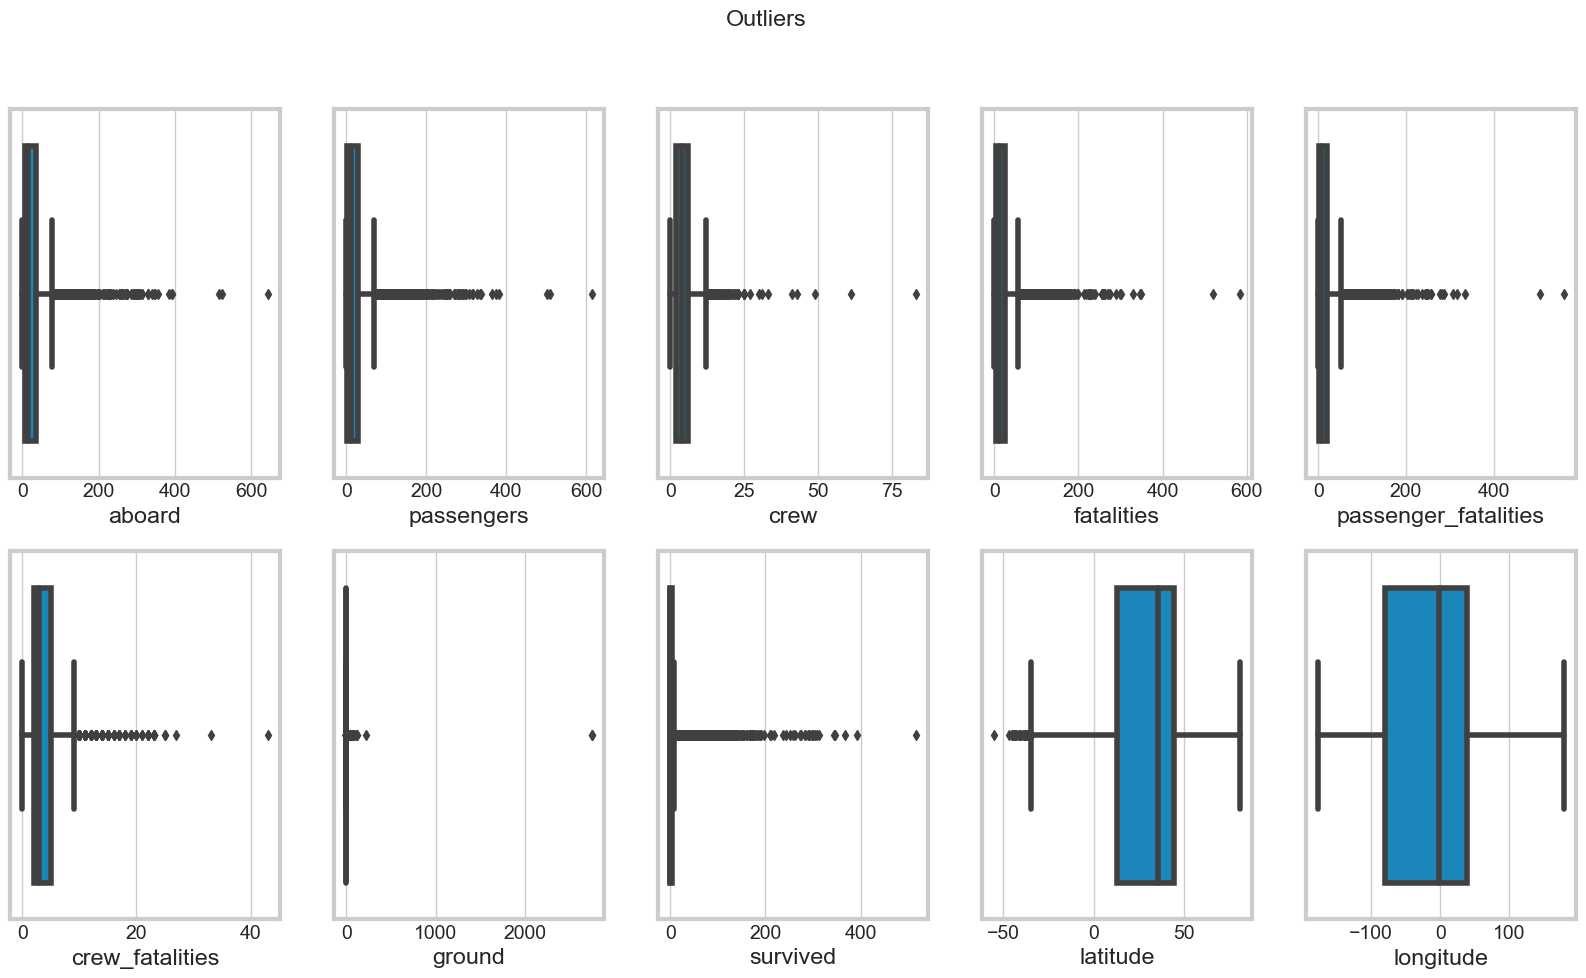

In [108]:
columns = ['aboard', 'passengers', 'crew', 'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground', 'survived', 'latitude', 'longitude']
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
fig.suptitle('Outliers')
nvar=0

for ii in range(2):
    for jj in range(5):
        sns.boxplot(ax=axes[ii, jj], data=df, x=columns[nvar])
        nvar+=1

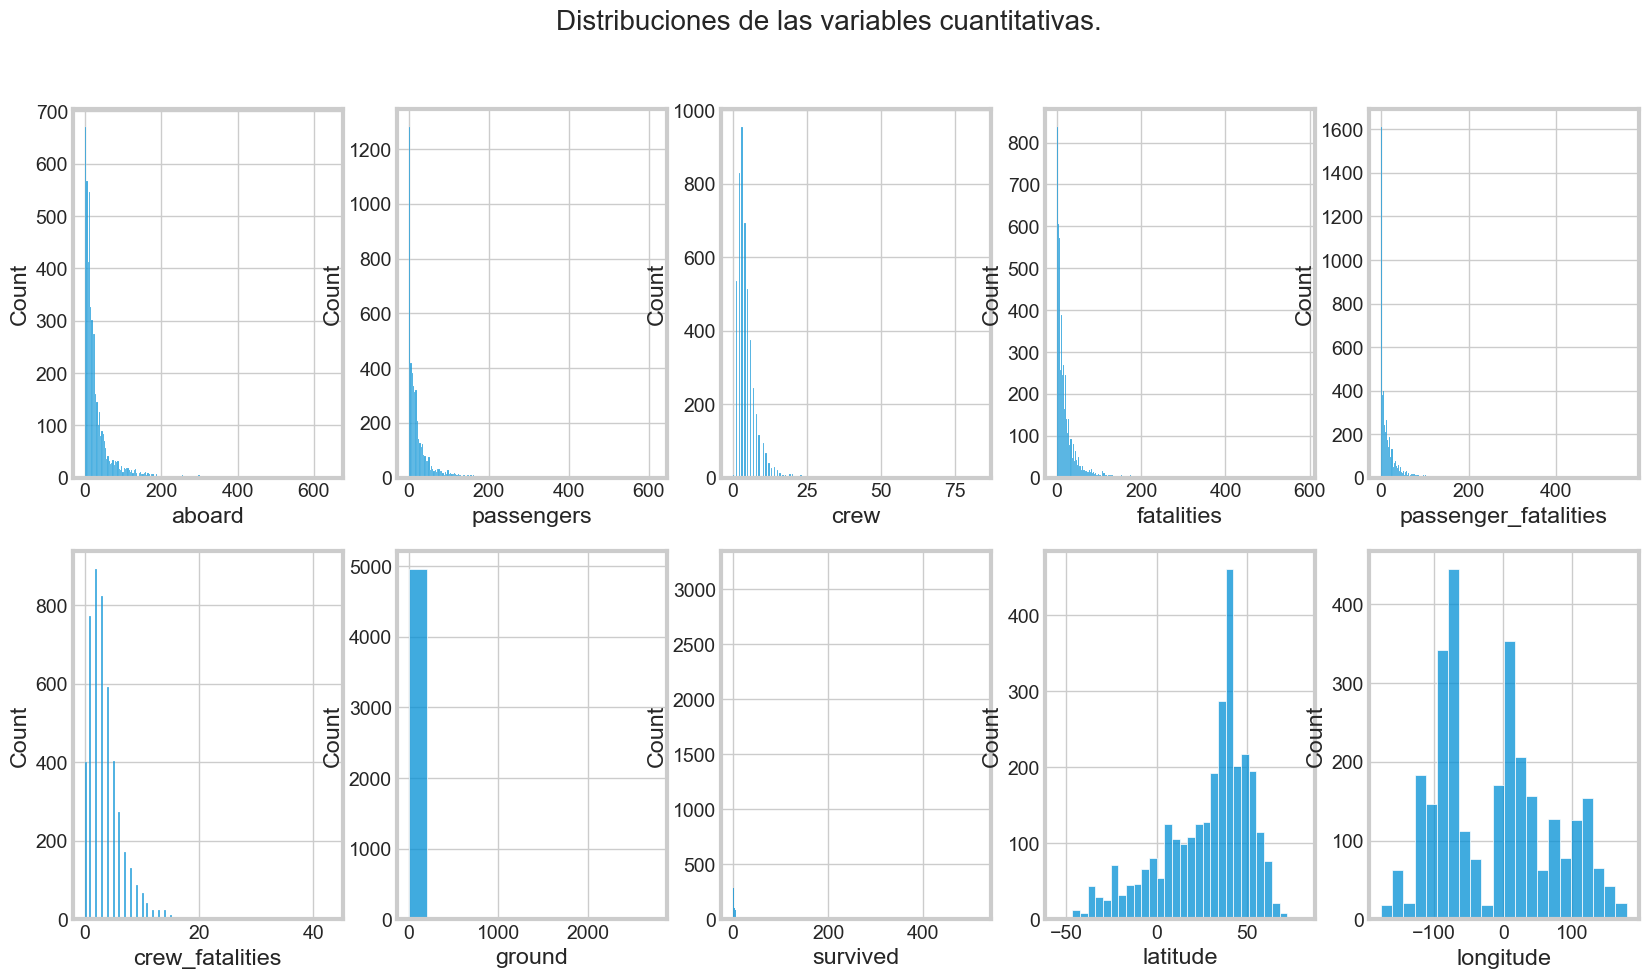

In [109]:
# Veamos la distribución de las variables cuantitativas
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
fig.suptitle('Distribuciones de las variables cuantitativas.', fontsize=20)
nvar=0

for ii in range(2):
    for jj in range(5):
        sns.histplot(ax=axes[ii, jj], data=df, x=columns[nvar])
        nvar+=1

Vamos a hacer una revisión final de las columnas para definir cuáles utilizaremos finalmente.

In [110]:
df.columns

Index(['id', 'date', 'time', 'location', 'operator', 'flight_no', 'route',
       'type', 'registration', 'cn_ln', 'aboard', 'passengers', 'crew',
       'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground',
       'summary', 'year', 'month', 'day', 'military', 'crash_site', 'survived',
       'survival_rate', 'day_of_the_week', 'month_year', 'temp_coor',
       'latitude', 'longitude', 'error_key', 'type_error', 'human_error',
       'landing', 'mechanical_issues', 'takeoff', 'terrorism', 'water_crash',
       'weather'],
      dtype='object')

Se descartaran las columna flight_no por la cantidad de valores nulos que posee. 

También se descartan las columnas latitude y longitude por la cantidad de valores faltantes. Es posible obtener la ubicación geográfica a partir de otras columnas del dataframe.

Las columna cn_ln no aporta ninguna información relevante por lo que será descartada. 

In [111]:
# Descartando las columnas.
df.drop(['id','flight_no', 'cn_ln', 'latitude', 'longitude', 'summary', 'location'], axis='columns', inplace=True)

A continuación se presenta una lista de todas las columnas con el porcentaje de valores nulos contenidos. 

In [112]:
# Porcentaje de valores nulos en cada columna.
df.isnull().sum()/df.shape[0]*100

date                     0.000000
time                    30.031949
operator                 0.000000
route                    0.000000
type                     0.000000
registration             0.000000
aboard                   0.339457
passengers               4.412939
crew                     4.373003
fatalities               0.159744
passenger_fatalities     4.692492
crew_fatalities          4.692492
ground                   0.878594
year                     0.000000
month                    0.000000
day                      0.000000
military                 0.000000
crash_site               0.000000
survived                 0.339457
survival_rate            0.439297
day_of_the_week          0.000000
month_year               0.000000
temp_coor               40.275559
error_key               35.163738
type_error              35.163738
human_error              0.000000
landing                  0.000000
mechanical_issues        0.000000
takeoff                  0.000000
terrorism     

Voy a importar algunos datos sobre la cantidad de vuelos realizados por año. El dataset fue extraído de la siguiente fuente:

https://data.worldbank.org/indicator/IS.AIR.DPRT

In [116]:
# Creando el dataframe
df_vuelos = pd.read_csv('data/API_IS.AIR.DPRT_DS2_en_csv_v2_4536741.csv', skiprows=3)
df_vuelos.drop(['Indicator Name','Indicator Code', 'Unnamed: 66'], axis='columns', inplace=True)
df_vuelos = df_vuelos.fillna(0)
df_passengers = df_vuelos.drop(['Country Name','Country Code'], axis='columns').sum()
df_passengers = df_passengers[df_passengers != 0]
df_passengers = df_passengers.rename('sum')
df_passengers.index.name = 'year'
df_passengers.to_csv('data/passengers_per_year.csv')

In [114]:
# Guardamos los dataframes en archivos csv. 
df.to_csv('data/aviones_eda.csv', index=False)
df_aviones.to_csv('data/aviones_departures.csv', index=False)